#Working with different datasets now

In [ ]:
from urllib.request import urlopen
import json
import pandas as pd
import numpy as np
!pip install requests pandas
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#need to update the dataset to Colab from local memory.

drivers= pd.read_csv('/content/drivers.csv')
results= pd.read_csv('/content/results.csv')
driver_standings=pd.read_csv('/content/driver_standings.csv')
constructors= pd.read_csv('/content/constructors.csv')
races= pd.read_csv('/content/races.csv')

In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [ ]:
#Removing \\N values from drivers dataset, specifically number columnn.

#drivers['number'].unique()
drivers['number'] = pd.to_numeric(drivers['number'], errors='coerce')
drivers = drivers.dropna(subset=['number'])
drivers['number'].unique()

array([44.,  6., 14.,  7., 88., 19., 99., 22.,  5.,  8., 10., 27., 13.,
       40., 11.,  3., 25.,  4., 21., 77., 17., 20., 26., 45.,  9., 28.,
       33., 12., 55., 98., 53., 30., 94.,  2., 31., 18., 16., 35., 63.,
       23., 51., 89., 47., 24., 81., 38., 43., 61.])

In [ ]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
#Removing \\N values from drivers dataset, specifically number columnn.


results['position']= pd.to_numeric(results['position'], errors='coerce')
results = results.dropna(subset=['position'])
results['position'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33.])

In [ ]:
driveranalysis= pd.merge(drivers,results, on='driverId')

In [ ]:
driveranalysis=driveranalysis.drop(['url','dob', 'number_x','statusId','code', 'positionOrder'], axis=1)

In [ ]:
driveranalysis['positionText'].replace('R','0',inplace=True)
driveranalysis['positionText'].replace('D','0',inplace=True)
driveranalysis['positionText'].replace('W','0',inplace=True)
driveranalysis['positionText'].replace('N','0',inplace=True)
driveranalysis['positionText'].replace('E','0',inplace=True)
driveranalysis['positionText'].replace('F','0',inplace=True)

driveranalysis['positionText']=driveranalysis['positionText'].astype(int)

<ipython-input-9-3320fb5b3ef6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  driveranalysis['positionText'].replace('R','0',inplace=True)
<ipython-input-9-3320fb5b3ef6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
firstPlace= driveranalysis[driveranalysis['positionText']==1]

In [ ]:
firstPlace.head()

,driverId,driverRef,forename,surname,nationality,resultId,raceId,constructorId,number_y,grid,position,positionText,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,hamilton,Lewis,Hamilton,British,1,18,1,22,1,1.0,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300
5,1,hamilton,Lewis,Hamilton,British,109,23,1,22,3,1.0,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152
7,1,hamilton,Lewis,Hamilton,British,169,26,1,22,4,1.0,1,10.0,60,1:39:09.440,5949440,16,3,1:32.817,199.398
8,1,hamilton,Lewis,Hamilton,British,189,27,1,22,1,1.0,1,10.0,67,1:31:20.874,5480874,17,2,1:16.039,216.552
15,1,hamilton,Lewis,Hamilton,British,329,34,1,22,1,1.0,1,10.0,56,1:31:57.403,5517403,13,1,1:36.325,203.722


In [ ]:
driver_wins = firstPlace['surname'].value_counts()


filtered_driver_wins = driver_wins[driver_wins > 10]

fig = px.bar(x=filtered_driver_wins.index,
             y=filtered_driver_wins.values,
             labels={'x': 'Driver', 'y': 'First Place Finishes (1950 - 2024)'},
             title='First Place Finishes (1950 - 2024)')

# Show the interactive chart
fig.show()

In [ ]:
podiumFinishes= driveranalysis[driveranalysis['positionText'].isin([1, 2, 3])]
podiums= podiumFinishes['surname'].value_counts()

filtered_podium_wins=podiums[podiums > 30]

fig = px.bar(x=filtered_podium_wins.index,
              y=filtered_podium_wins.values,
              labels={'x': 'Driver', 'y': 'Podium Finishes (1950 - 2024)'},
              title='Podium Place Finishes (1950 - 2024)')

#Show the interactive chart
fig.show()

In [ ]:
podiumFinishes.head()

,driverId,driverRef,forename,surname,nationality,resultId,raceId,constructorId,number_y,grid,position,positionText,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,hamilton,Lewis,Hamilton,British,1,18,1,22,1,1.0,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300
3,1,hamilton,Lewis,Hamilton,British,69,21,1,22,5,3.0,3,6.0,66,+4.187,5903238,20,3,1:22.017,204.323
4,1,hamilton,Lewis,Hamilton,British,90,22,1,22,3,2.0,2,8.0,58,+3.779,5213230,31,2,1:26.529,222.085
5,1,hamilton,Lewis,Hamilton,British,109,23,1,22,3,1.0,1,10.0,76,2:00:42.742,7242742,71,6,1:18.510,153.152
7,1,hamilton,Lewis,Hamilton,British,169,26,1,22,4,1.0,1,10.0,60,1:39:09.440,5949440,16,3,1:32.817,199.398


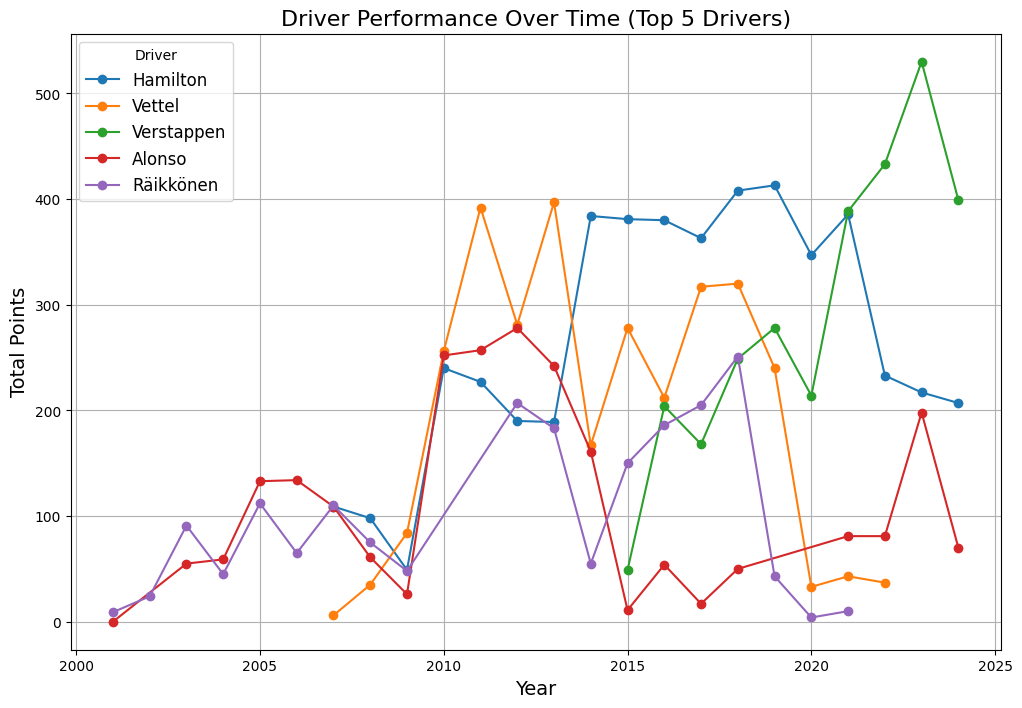

In [ ]:
results_merged = results.merge(drivers, on='driverId', how='left') \
                        .merge(races, on='raceId', how='left') \
                        .merge(constructors, on='constructorId', how='left')

# Extract driver performance data
# Filter only completed races (statusId can help exclude DNFs if relevant)
results_merged['year'] = pd.to_datetime(results_merged['date']).dt.year
driver_performance = results_merged.groupby(['surname', 'year']).agg({
    'points': 'sum',  # Total points in a year
    'position': lambda x: (x == 1).sum(),  # Total wins
}).reset_index()

# Rename columns for clarity
driver_performance.rename(columns={'points': 'Total Points', 'position': 'Wins'}, inplace=True)

# Filter top drivers with significant performance
top_drivers = driver_performance.groupby('surname')['Total Points'].sum().nlargest(5).index
driver_performance = driver_performance[driver_performance['surname'].isin(top_drivers)]

# Plot the performance over time
plt.figure(figsize=(12, 8))
for driver in top_drivers:
    driver_data = driver_performance[driver_performance['surname'] == driver]
    plt.plot(driver_data['year'], driver_data['Total Points'], label=driver, marker='o')

plt.title('Driver Performance Over Time (Top 5 Drivers)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.legend(title='Driver', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [ ]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
7,8,raikkonen,7.0,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
8,9,kubica,88.0,KUB,Robert,Kubica,1984-12-07,Polish,http://en.wikipedia.org/wiki/Robert_Kubica


In [ ]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1.0,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2.0,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3.0,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4.0,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5.0,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [ ]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


Missing driver names for IDs: ['10', '102', '105', '11', '110', '117', '118', '119', '123', '137', '14', '15', '158', '163', '17', '172', '173', '175', '176', '177', '178', '182', '187', '197', '199', '2', '200', '207', '21', '22', '221', '222', '223', '224', '23', '235', '238', '278', '289', '30', '304', '31', '328', '341', '346', '347', '35', '356', '360', '37', '373', '44', '49', '5', '55', '56', '57', '63', '65', '71', '77', '84', '94', '95']


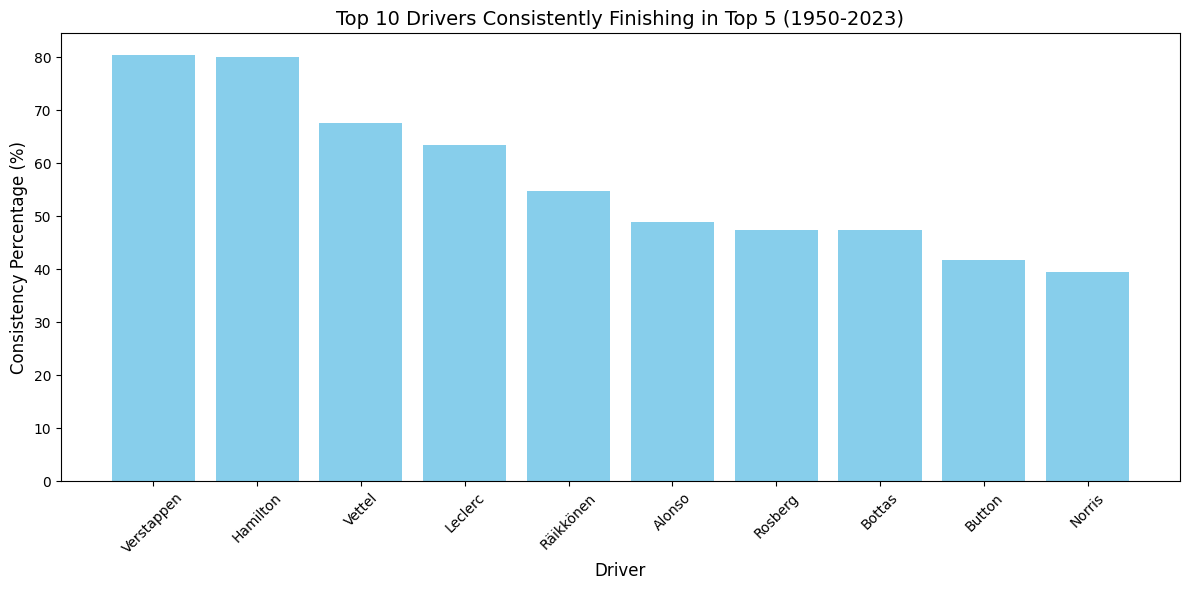

In [ ]:
# Ensure consistent data types for merging
results['driverId'] = results['driverId'].astype(str)
drivers['driverId'] = drivers['driverId'].astype(str)

# Filter results for top 5 finishes
top_5_results = results[results['position'].apply(pd.to_numeric, errors='coerce') <= 5]

# Count total races for each driver
total_races = results.groupby('driverId')['raceId'].count().reset_index()
total_races.columns = ['driverId', 'total_races']

# Count top 5 finishes for each driver
top_5_counts = top_5_results.groupby('driverId')['raceId'].count().reset_index()
top_5_counts.columns = ['driverId', 'top_5_finishes']

# Merge top 5 counts with total races
consistency_data = top_5_counts.merge(total_races, on='driverId', how='left')

# Filter for drivers with at least 50 races
consistency_data = consistency_data[consistency_data['total_races'] >= 50]

# Calculate consistency percentage
consistency_data['consistency_percentage'] = (consistency_data['top_5_finishes'] / consistency_data['total_races']) * 100

# Merge with drivers dataset to get driver names
consistency_data = consistency_data.merge(drivers[['driverId', 'surname', 'forename']], on='driverId', how='left')

# Handle missing names (optional debugging)
missing_drivers = consistency_data[consistency_data['surname'].isna()]
if not missing_drivers.empty:
    print("Missing driver names for IDs:", missing_drivers['driverId'].tolist())

# Drop rows with missing names (optional, based on your preference)
consistency_data = consistency_data.dropna(subset=['surname', 'forename'])

# Sort by consistency percentage
consistency_data = consistency_data.sort_values(by='consistency_percentage', ascending=False)

# Plot the top 10 most consistent drivers
top_10_consistent_drivers = consistency_data.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_consistent_drivers['surname'], top_10_consistent_drivers['consistency_percentage'], color='skyblue')
plt.xlabel('Driver', fontsize=12)
plt.ylabel('Consistency Percentage (%)', fontsize=12)
plt.title('Top 10 Drivers Consistently Finishing in Top 5 (1950-2023)', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

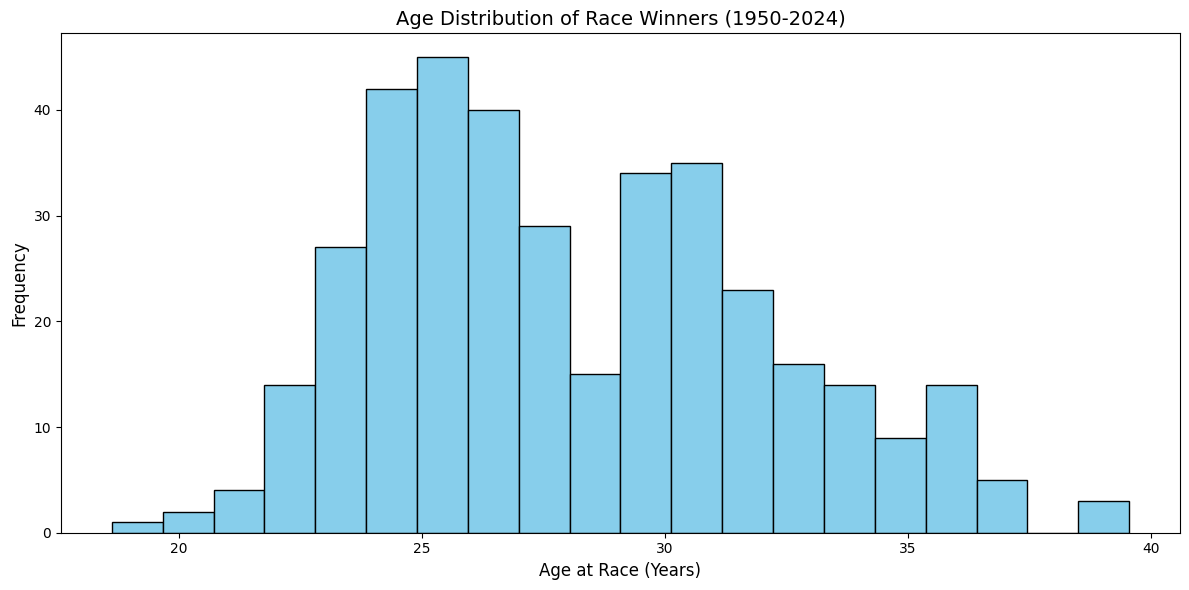

In [ ]:
results['driverId'] = results['driverId'].astype(str)
drivers['driverId'] = drivers['driverId'].astype(str)

# Merge results with drivers and races datasets
results_with_details = results.merge(drivers[['driverId', 'dob', 'forename', 'surname']], on='driverId', how='left')
results_with_details = results_with_details.merge(races[['raceId', 'date']], on='raceId', how='left')

# Convert dates to datetime
results_with_details['dob'] = pd.to_datetime(results_with_details['dob'])
results_with_details['date'] = pd.to_datetime(results_with_details['date'])

# Calculate age during each race
results_with_details['age_at_race'] = (results_with_details['date'] - results_with_details['dob']).dt.days / 365.25

# Filter for race winners (position = 1)
race_winners = results_with_details[results_with_details['position'].apply(pd.to_numeric, errors='coerce') == 1]

# Group by driver and calculate average age
average_age_by_driver = race_winners.groupby('driverId').agg({
    'age_at_race': 'mean',
    'forename': 'first',
    'surname': 'first'
}).reset_index()

average_age_by_driver = average_age_by_driver.sort_values(by='age_at_race', ascending=False)

# Visualize the age distribution of race winners
plt.figure(figsize=(12, 6))
plt.hist(race_winners['age_at_race'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age at Race (Years)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Age Distribution of Race Winners (1950-2024)', fontsize=14)
plt.tight_layout()
plt.show()
